In [1]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow
import math

In [3]:
#plot
def plotImages(images):
        _, ax = plt.subplots(1, len(images), figsize=(5 * len(images), 5))
        for i in range(len(images)):
                ax[i].imshow(images[i], cmap='gray')
        plt.show()


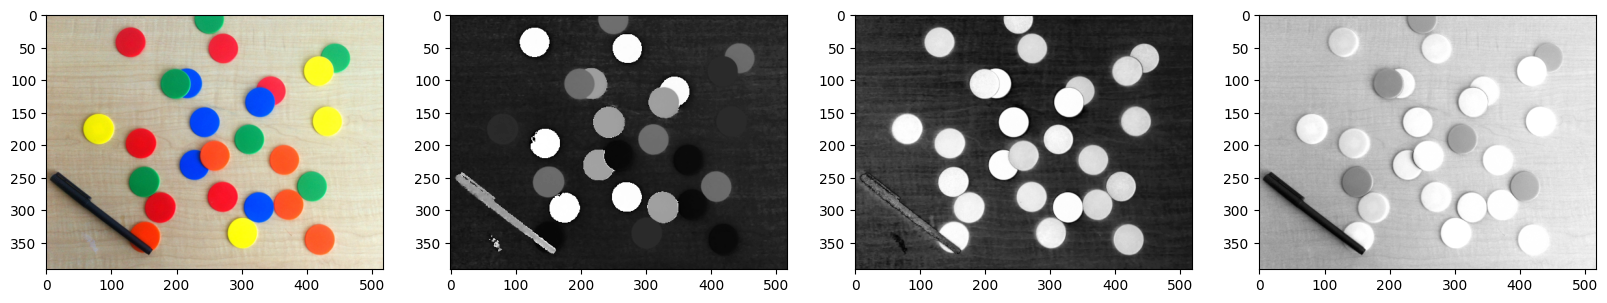

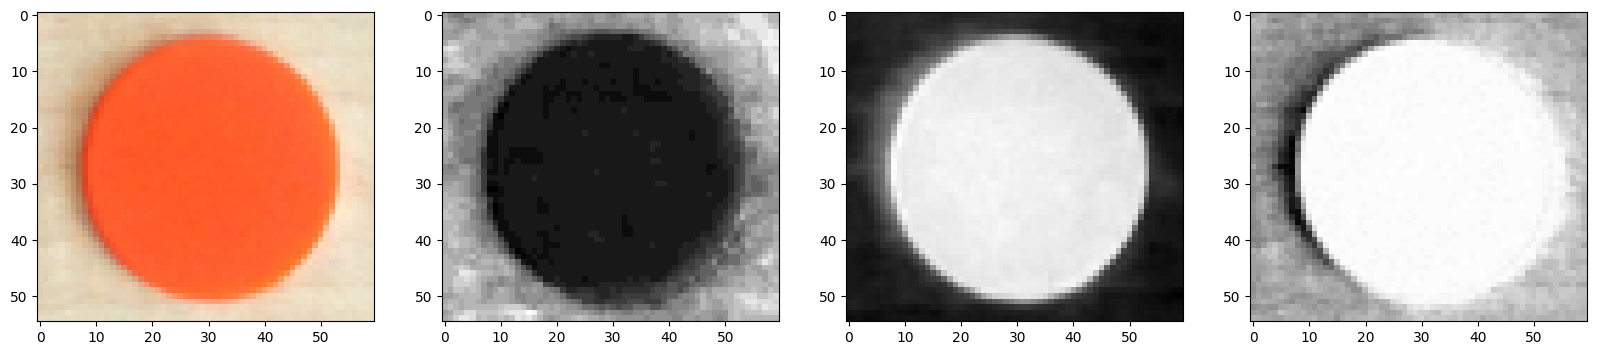

In [4]:

chips = cv2.imread("chips.png")
chips_crop = chips[318:373,390:450]

rgb_chips = cv2.cvtColor(chips, cv2.COLOR_BGR2RGB)
hsv_chips = cv2.cvtColor(chips, cv2.COLOR_BGR2HSV)

rgb_crop = cv2.cvtColor(chips_crop, cv2.COLOR_BGR2RGB)
hsv_crop = cv2.cvtColor(chips_crop, cv2.COLOR_BGR2HSV)

ch1, ch2, ch3 = cv2.split(hsv_chips)
cr1, cr2, cr3 = cv2.split(hsv_crop)

result_chips = [rgb_chips, ch1, ch2, ch3]
result_crop = [rgb_crop, cr1, cr2, cr3]

plotImages(result_chips)
plotImages(result_crop)


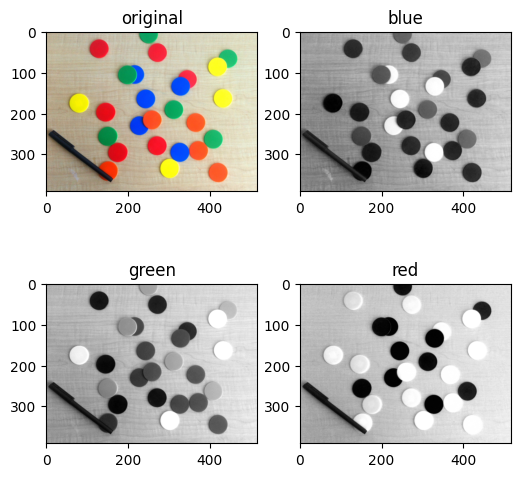

In [5]:
#RGB
img = cv2.imread("chips.png")

#Separa os canais da imagem
bgr = cv2.split(img)

img_plot = cv2.cvtColor(img,cv2.COLOR_BGR2RGB) #-> convertido pois os plots serao em plt, BGR -> RGB

plt.figure(figsize = (6,6)) #montar o tamanho da imagem
plt.subplot(221); plt.title("original"); plt.imshow(img_plot) #plot imagem original

plt.subplot(222);
plt.title("blue");
plt.imshow(bgr[0], cmap='gray')

plt.subplot(223);
plt.title("green");
plt.imshow(bgr[1], cmap='gray')

plt.subplot(224);
plt.title("red");
plt.imshow(bgr[2], cmap='gray')

plt.show()

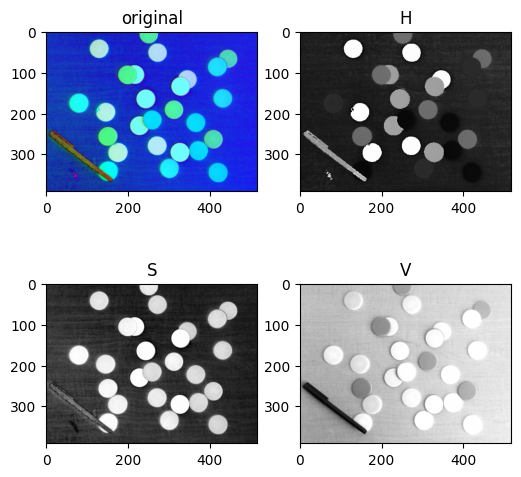

In [30]:
#HSV

img = cv2.imread("chips.png") #BGR

img = cv2.cvtColor(img,cv2.COLOR_BGR2HSV)

#Separa os canais da imagem
bgr = cv2.split(img)

plt.figure(figsize = (6,6)) #montar o tamanho da imagem
plt.subplot(221); plt.title("original"); plt.imshow(img) #plot imagem original

plt.subplot(222);
plt.title("H");
plt.imshow(bgr[0], cmap='gray')

plt.subplot(223);
plt.title("S");
plt.imshow(bgr[1], cmap='gray')

plt.subplot(224);
plt.title("V");
plt.imshow(bgr[2], cmap='gray')

plt.show()



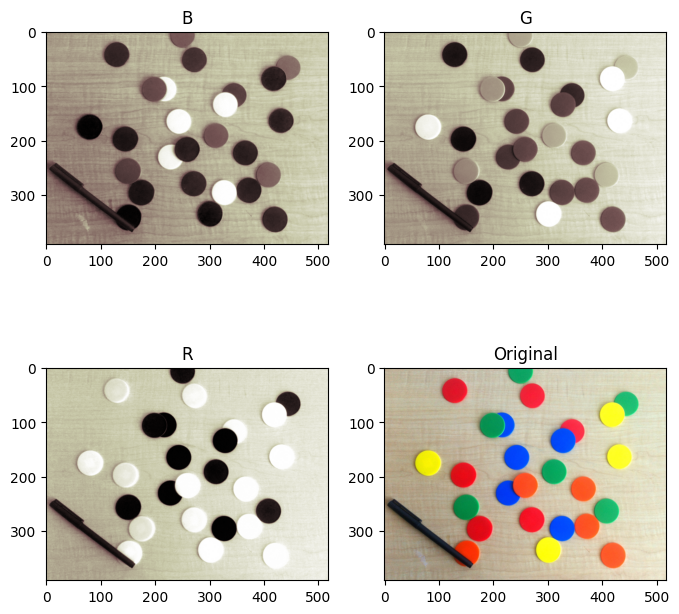

In [7]:
#%% Load a color image and visualize each channel separately
img = cv2.imread('chips.png', cv2.IMREAD_COLOR)
bgr = cv2.split(img)
#colormap = cv2.COLORMAP_JET
colormap = 1

plt.figure(figsize=(8,8))
plt.subplot(221); plt.title('B'); plt.imshow(cv2.applyColorMap(bgr[0], colormap))
plt.subplot(222); plt.title('G'); plt.imshow(cv2.applyColorMap(bgr[1], colormap))
plt.subplot(223); plt.title('R'); plt.imshow(cv2.applyColorMap(bgr[2], colormap))
plt.subplot(224); plt.title('Original'); plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

In [8]:
def bgr2rgb(img):
    return cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

In [54]:
def bgr2hsv(img):
    return cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
def bgr2ycrcb(img):
    return cv2.cvtColor(img, cv2.COLOR_BGR2YCrCb)
def bgr2gray(img):
    return cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

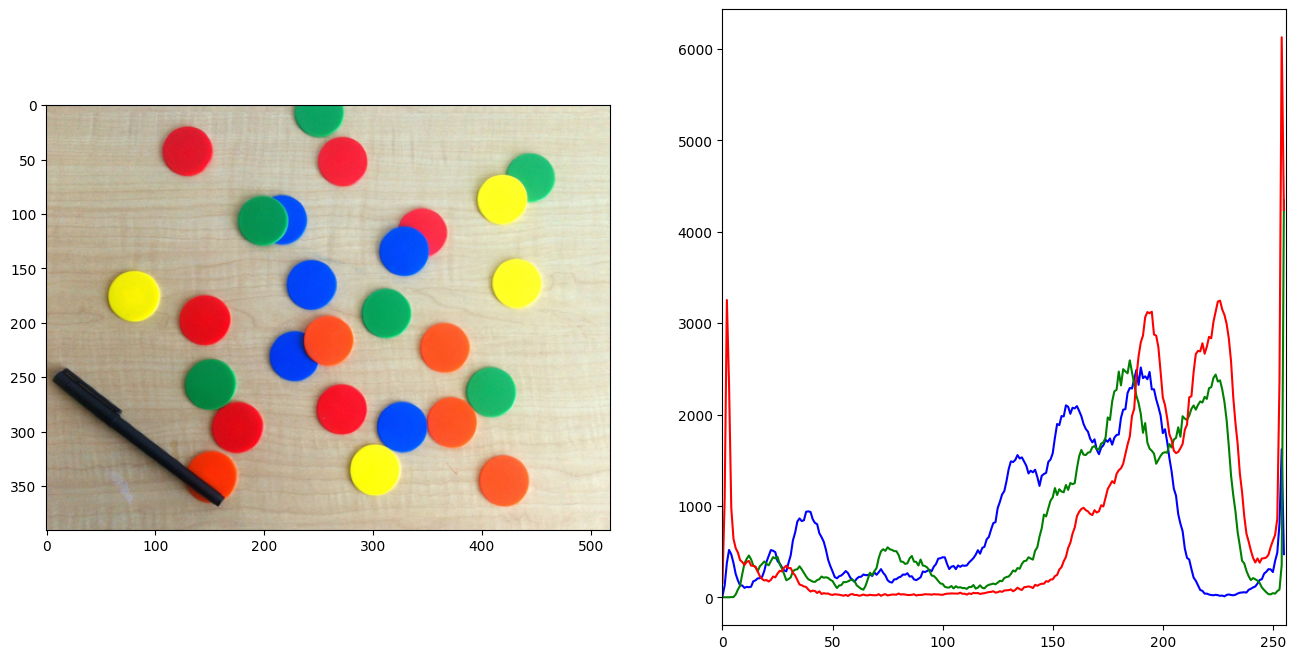

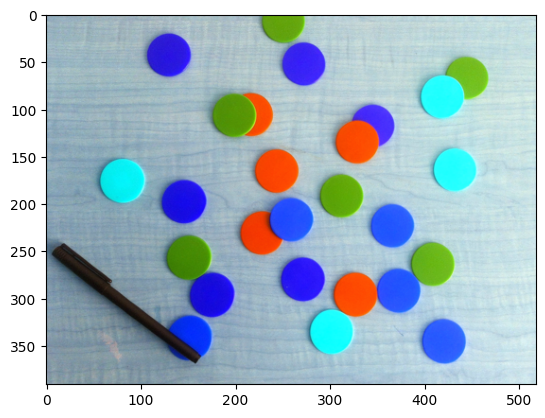

In [10]:
#Histograma RGB
imfile = 'chips.png'
img = cv2.imread(imfile, cv2.IMREAD_COLOR)

color = ('b', 'g', 'r')

plt.figure(figsize=(16,8))
plt.subplot(121), plt.imshow(bgr2rgb(img))
plt.subplot(122)
for i, col in enumerate(color):
    hist = cv2.calcHist([img], [i], None, [256], [0, 256])
    plt.plot(hist, color=col)
    plt.xlim([0, 256])
plt.show()

plt.imshow(img)


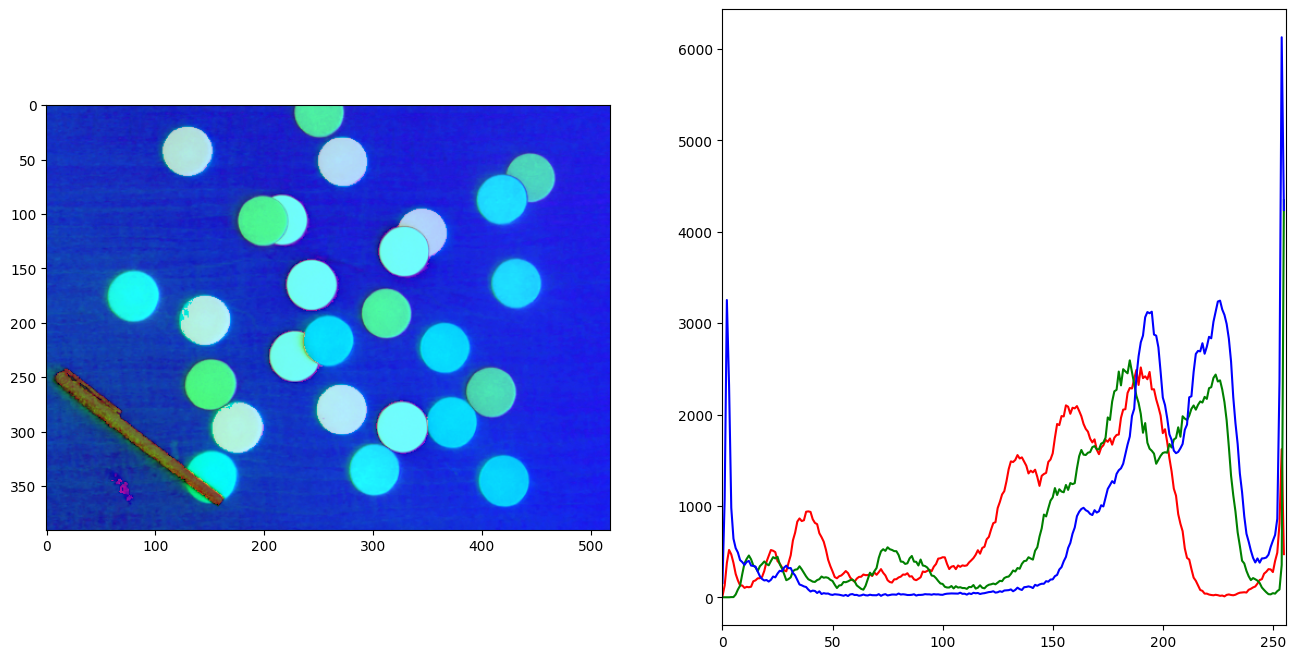

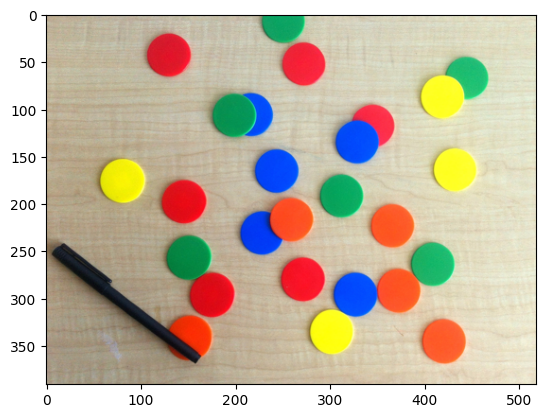

In [29]:
#Histograma HSV
imfile = 'chips.png'
img = cv2.imread(imfile, cv2.IMREAD_COLOR)
color = ('r', 'g', 'b')

plt.figure(figsize=(16,8))
plt.subplot(121), plt.imshow(bgr2hsv(img))
plt.subplot(122)
for i, col in enumerate(color):
    hist = cv2.calcHist([img], [i], None, [256], [0, 256])
    plt.plot(hist, color=col)
    plt.xlim([0, 256])
plt.show()

plt.imshow(bgr2rgb(img))



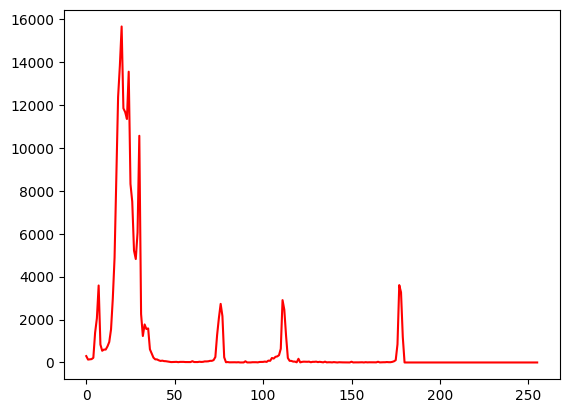

In [12]:
#Plotando canais HSV
img2 = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
h, s, v = img2[:,:,0], img2[:,:,1], img2[:,:,2]
hist_h = cv2.calcHist([h],[0],None,[256],[0,256])
#hist_s = cv2.calcHist([s],[0],None,[256],[0,256])
#hist_v = cv2.calcHist([v],[0],None,[256],[0,256])
plt.plot(hist_h, color='r', label="hue")

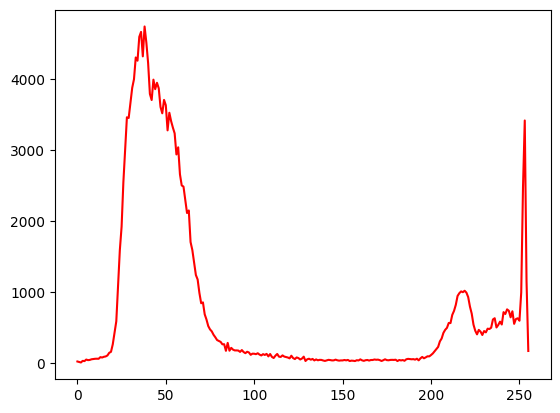

In [13]:
img2 = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
h, s, v = img2[:,:,0], img2[:,:,1], img2[:,:,2]
#hist_h = cv2.calcHist([h],[0],None,[256],[0,256])
hist_s = cv2.calcHist([s],[0],None,[256],[0,256])
#hist_v = cv2.calcHist([v],[0],None,[256],[0,256])
plt.plot(hist_s, color='r', label="hue")

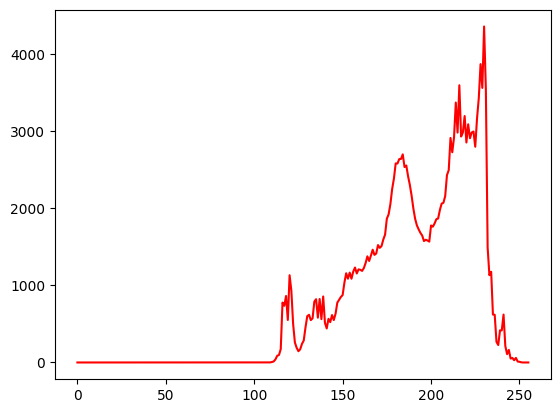

In [67]:
img2 = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
h, s, v = img2[:,:,0], img2[:,:,1], img2[:,:,2]
#hist_h = cv2.calcHist([h],[0],None,[256],[0,256])
#hist_s = cv2.calcHist([s],[0],None,[256],[0,256])
hist_v = cv2.calcHist([v],[0],None,[256],[0,256])
plt.plot(hist_v, color='r', label="hue")

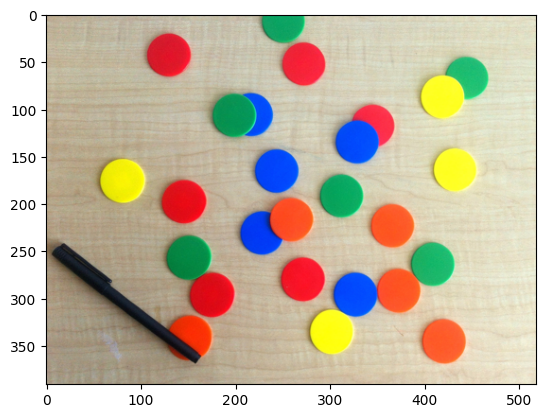

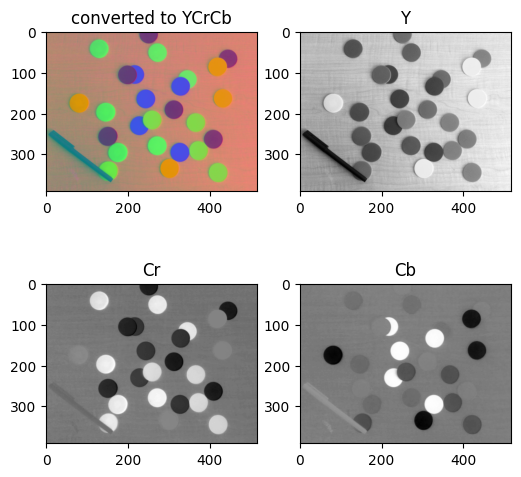

In [32]:
#Ycrcb

imfile = 'chips.png'
img_original = cv2.imread(imfile, cv2.IMREAD_COLOR)
plt.imshow(bgr2rgb(img_original))
img = cv2.cvtColor(img_original,cv2.COLOR_BGR2YCrCb)


#Separa os canais da imagem
YCrCb = cv2.split(img)

plt.figure(figsize = (6,6)) #montar o tamanho da imagem
plt.subplot(221);plt.title("converted to YCrCb"); plt.imshow(img)

plt.subplot(222);
plt.title("Y");
plt.imshow(YCrCb[0], cmap='gray')

plt.subplot(223);
plt.title("Cr");
plt.imshow(YCrCb[1], cmap='gray')

plt.subplot(224);
plt.title("Cb");
plt.imshow(YCrCb[2], cmap='gray')

plt.show()

O canal Y representa a imagem em escala de cinza, com o objetivo de mostrar a luminância da imagem

In [69]:
#erro médio quadrado (depende da célula acima)
y = YCrCb[0]
gray = cv2.imread(imfile, cv2.IMREAD_GRAYSCALE)
summation = 0
n = len(y)
for i in range (0,n):  #
  difference = y[i] - gray[i]
  squared_difference = difference**2
  summation = summation + squared_difference
MSE_List = summation/n
MSE = np.sum(MSE_List/n)
print("MSE geral: ", MSE)

MSE geral:  0.6718493468776369


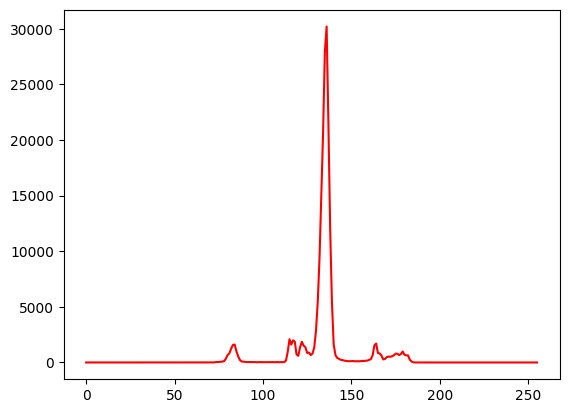

In [62]:
#Histograma YCrCb
img3 = cv2.cvtColor(img, cv2.COLOR_BGR2YCrCb)
Y, Cr, Cb = img3[:,:,0], img3[:,:,1], img3[:,:,2]
hist_Y = cv2.calcHist([Y],[0],None,[256],[0,256])
#hist_Cr = cv2.calcHist([Cr],[0],None,[256],[0,256])
#hist_Cb = cv2.calcHist([Cb],[0],None,[256],[0,256])
plt.plot(hist_Y, color='r', label="hue")

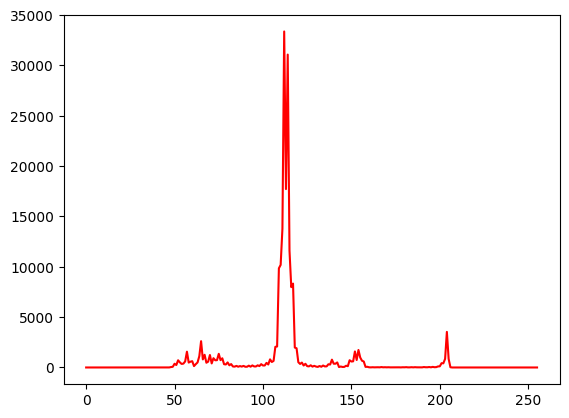

In [64]:
#Histograma YCrCb
img3 = cv2.cvtColor(img, cv2.COLOR_BGR2YCrCb)
Y, Cr, Cb = img3[:,:,0], img3[:,:,1], img3[:,:,2]
#hist_Y = cv2.calcHist([Y],[0],None,[256],[0,256])
hist_Cr = cv2.calcHist([Cr],[0],None,[256],[0,256])
#hist_Cb = cv2.calcHist([Cb],[0],None,[256],[0,256])
plt.plot(hist_Cr, color='r', label="hue")

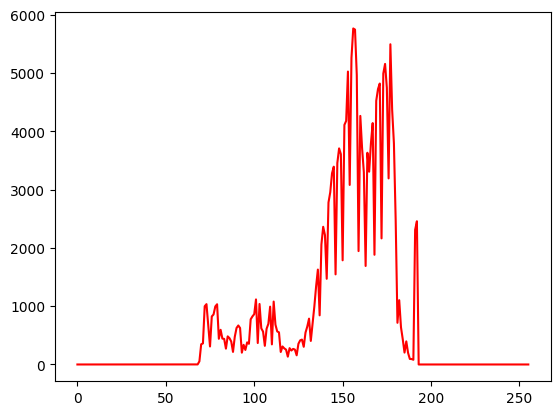

In [66]:
#Histograma YCrCb
img3 = cv2.cvtColor(img, cv2.COLOR_BGR2YCrCb)
Y, Cr, Cb = img3[:,:,0], img3[:,:,1], img3[:,:,2]
#hist_Y = cv2.calcHist([Y],[0],None,[256],[0,256])
#hist_Cr = cv2.calcHist([Cr],[0],None,[256],[0,256])
hist_Cb = cv2.calcHist([Cb],[0],None,[256],[0,256])
plt.plot(hist_Cb, color='r', label="hue")

Poderíamos segmentar as cores determinando um limiar entre os picos mostrados nos historgramas Cr e Cb, com o canal Y mostrando a luminância de cada cor.